# 第三回：布局格式定方圆

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

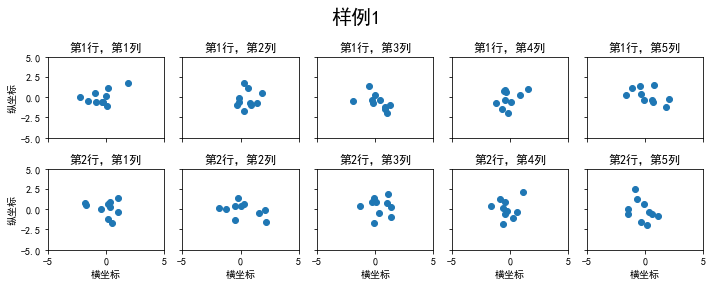

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
# fig.tight_layout(pad=3, w_pad=2, h_pad=2)
fig.tight_layout()

`fig.tight_layout()`未起到该有的效果可能因为版本问题。

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

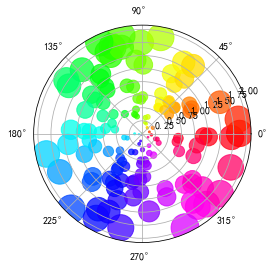

In [3]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

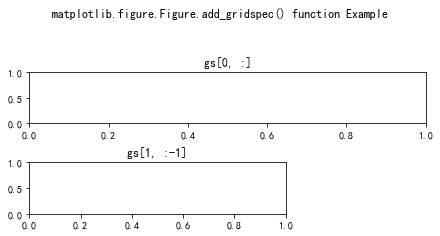

In [4]:
# Implementation of matplotlib function 
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
  
  
fig = plt.figure(constrained_layout = True) 
gs = fig.add_gridspec(3, 3) 
ax = fig.add_subplot(gs[0, :]) 
ax.set_title('gs[0, :]') 
ax2 = fig.add_subplot(gs[1, :-1]) 
ax2.set_title('gs[1, :-1]') 
  
  
fig.suptitle('matplotlib.figure.Figure.add_gridspec() function Example\n\n', fontweight ="bold") 
  
plt.show() 

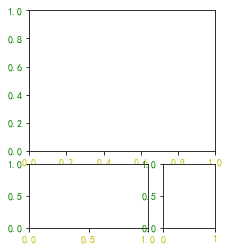

In [5]:
fig=plt.figure(constrained_layout=False)
gs=fig.add_gridspec(nrows=3,ncols=3,left=0.05,right=0.48,wspace=0.3) 
#left,right调整子图在整个figure上的位置，这样做和constrained_layout=True/figure.tight_out冲突
#添加自定义的子图所占区域

f_ax1=fig.add_subplot(gs[:-1,:]) 
f_ax2=fig.add_subplot(gs[-1,:-1]) 
f_ax3=fig.add_subplot(gs[-1,-1]) 

for ax in fig.axes:
    for xtick in ax.xaxis.get_ticklabels():
        xtick.set_color('y')    
    for ytick in ax.yaxis.get_ticklabels():
        ytick.set_color('g') 

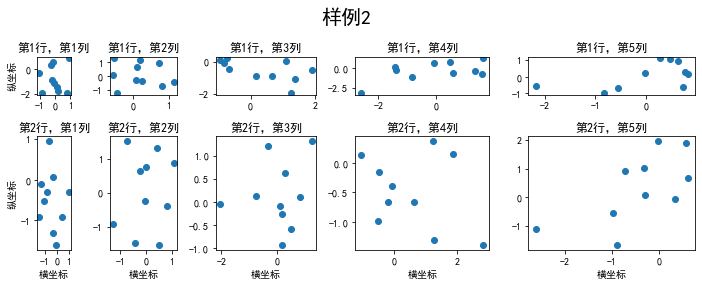

In [6]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

**注意要求matplotlib版本需要3.3以上**

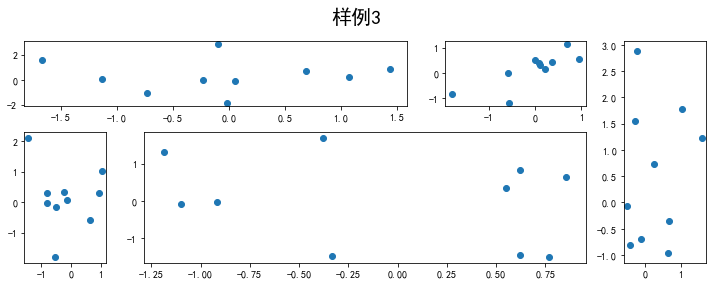

In [7]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

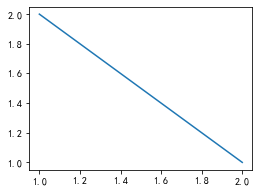

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

(array([  7.,  18.,  80., 145., 229., 269., 157.,  66.,  22.,   7.]),
 array([-3.29325156, -2.64570493, -1.99815829, -1.35061165, -0.70306501,
        -0.05551838,  0.59202826,  1.2395749 ,  1.88712154,  2.53466818,
         3.18221481]),
 <BarContainer object of 10 artists>)

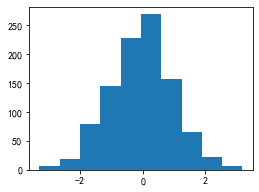

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

常用直线的画法为： `axhline, axvline, axline` （水平、垂直、任意方向）

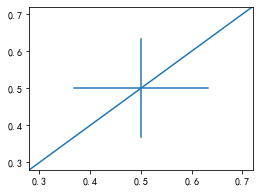

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7])

使用 `grid` 可以加灰色网格

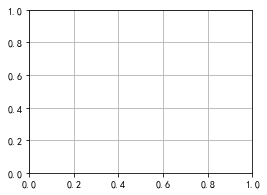

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

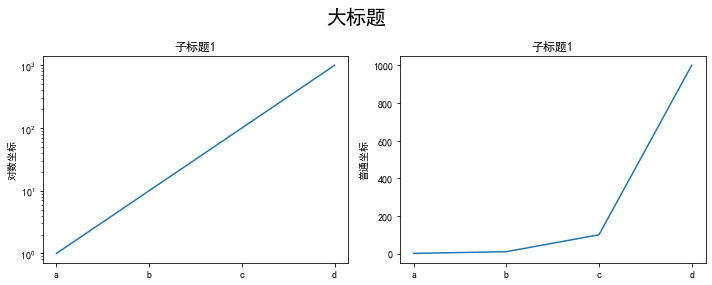

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('大标题', size=20)
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

Text(0.8, 0.2, '这是中点')

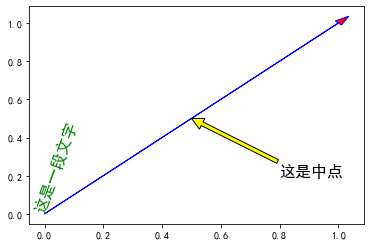

In [14]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16)

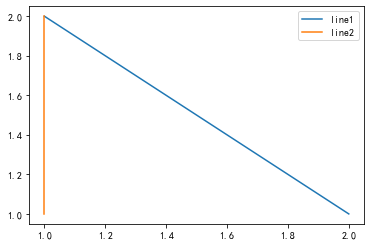

In [17]:
fig, ax = plt.subplots()
ax.plot([1,2],[2,1],label="line1")
ax.plot([1,1],[1,2],label="line2")
ax.legend(loc=1)

其中，图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |

## 作业

### 1. 墨尔本1981年至1990年的每月温度情况

In [37]:
ex1 = pd.read_csv('data/layout_ex1.csv')
ex1.head(50)
#ex1["Temperature"]

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323
5,1981-06,7.306667
6,1981-07,7.577419
7,1981-08,7.238710
8,1981-09,10.143333
9,1981-10,10.087097


In [40]:
ex1["Temperature"][0:12]

0     17.712903
1     17.678571
2     13.500000
3     12.356667
4      9.490323
5      7.306667
6      7.577419
7      7.238710
8     10.143333
9     10.087097
10    11.890000
11    13.680645
Name: Temperature, dtype: float64

In [45]:
ex1["Time"][0][:4]

'1981'

- 请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

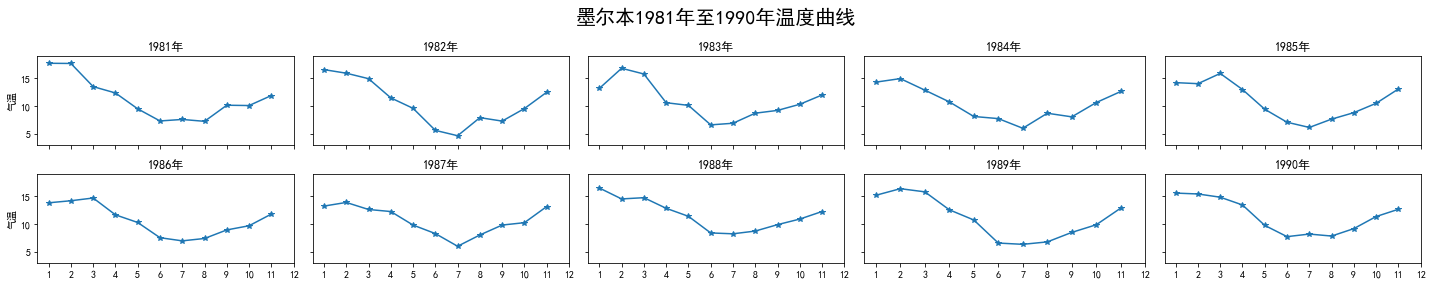

In [98]:
from matplotlib.pyplot import MultipleLocator

fig = plt.figure(figsize=(20, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[4,4,4,4.4,4], height_ratios=[2,2])
# fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle('墨尔本1981年至1990年温度曲线', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.plot([i for i in range(1,12)], ex1["Temperature"][((i*5)+j)*12:((i*5)+j)*12+11],'*-')  
        ax.set_title(ex1["Time"][((i*5)+j)*12][:4]+"年")
        if j==0: ax.set_ylabel('气温') 
        #new_ticks = np.linspace(1, 12, 12)
        #print(new_ticks)
        #plt.xticks(new_ticks)
        #new_ticky = np.linspace(5, 15, 3)
        #print(new_ticky)
        #plt.yticks(new_ticks)
        x_major_locator=MultipleLocator(1) #把x轴的刻度间隔设置为1，并存在变量里
        y_major_locator=MultipleLocator(5) #把y轴的刻度间隔设置为10，并存在变量里
        ax=plt.gca() #ax为两条坐标轴的实例
        ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为1的倍数
        ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数
        plt.xlim(0.5,12) #把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
        plt.ylim(3,19) #把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
        if i==0: 
            # ax = plt.gca()
            ax.set_xticklabels([])
        if j!=0: ax.set_yticklabels([])
fig.tight_layout()


### 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

In [99]:
ex = np.random.randn(2, 150)

fig, axs = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
# fig.tight_layout(pad=3, w_pad=2, h_pad=2)
fig.tight_layout()

array([[ 1.33633194e+00, -8.33776565e-01,  3.43499074e-01,
        -1.45018842e+00, -4.66039074e-01, -6.44547755e-01,
         8.57794506e-01, -1.32442166e-01,  4.57541817e-01,
        -2.86399135e+00, -9.99391191e-01, -1.70776623e-01,
         5.08406603e-01,  6.32101232e-01,  6.60810449e-01,
        -8.43950090e-01,  1.08992644e-01,  1.00239450e+00,
        -1.85139758e+00, -1.34971420e+00,  7.36323465e-01,
        -1.42879555e-02,  1.32125777e+00, -1.66600306e-01,
        -6.67040365e-01,  8.48784083e-01, -4.44713617e-02,
        -9.22444813e-01,  1.16972294e+00,  9.77528386e-01,
         3.15509653e-01,  1.61237324e-01, -9.79310211e-01,
         4.56185572e-01, -1.84753341e-01, -1.48205676e-01,
        -1.28916163e+00, -3.22912058e-01, -1.50033708e+00,
        -4.42021790e-01, -6.06949600e-01, -9.75895694e-01,
         5.52264754e-01, -3.09258794e-02,  4.28196472e-01,
        -3.36314439e-01, -2.16222130e-01,  7.12135409e-01,
        -2.15031045e-01, -1.46640977e+00, -1.89685251e-0